타이타닉 생존자 예측 경진대회 
* 1912년에 일어난 타이타닉호 침몰 사고를 소재로 하고 있습니다. 
* 타이타닉호 침몰 사고는 승객 2224명 중 1502명이 사망한 당시로서는 유례없는 해상 조난 사고였음 
* 승객의 성별과 연령, 승선 티켓 등급 등 여러 정보가 들어 있고, 이들의 생사 여부도 함께 주어짐
* 승객 정보를 보고 생사에 영향을 주는 속성이 무엇이며, 어떤 경향을 보이는지 파악한 후 생사 여부를 예측하는 것 (테스트 데이터)

- 'Survived' : 생존 여부
- 'Pclass'   : 티켓 등급
- 'Name'     : 이름 ,
- 'Sex',
- 'Age',
- 'SibSp'     : 승선 중인 형제나 배우자의 수
- 'Parch'     : 승선 중인 부모나 자녀의 수
- 'Ticket',
- 'Fare',
- 'Cabin'     : 방번호
- 'Embarked'  : 승선한 항구의 이름

In [2]:
import pandas as pd
import random
import numpy as np
np.random.seed(1234)
random.seed(1234)

In [9]:
#1. train_df, test_df 이름으로 DataFrame 생성 
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [10]:
#2. EDA 
#-train, test 데이터 형상 확인 
#train_df.head(3)
train_df.shape

(891, 12)

In [11]:
test_df.shape

(418, 11)

In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#null값도 전부 포함
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [21]:
import missingno

<Axes: >

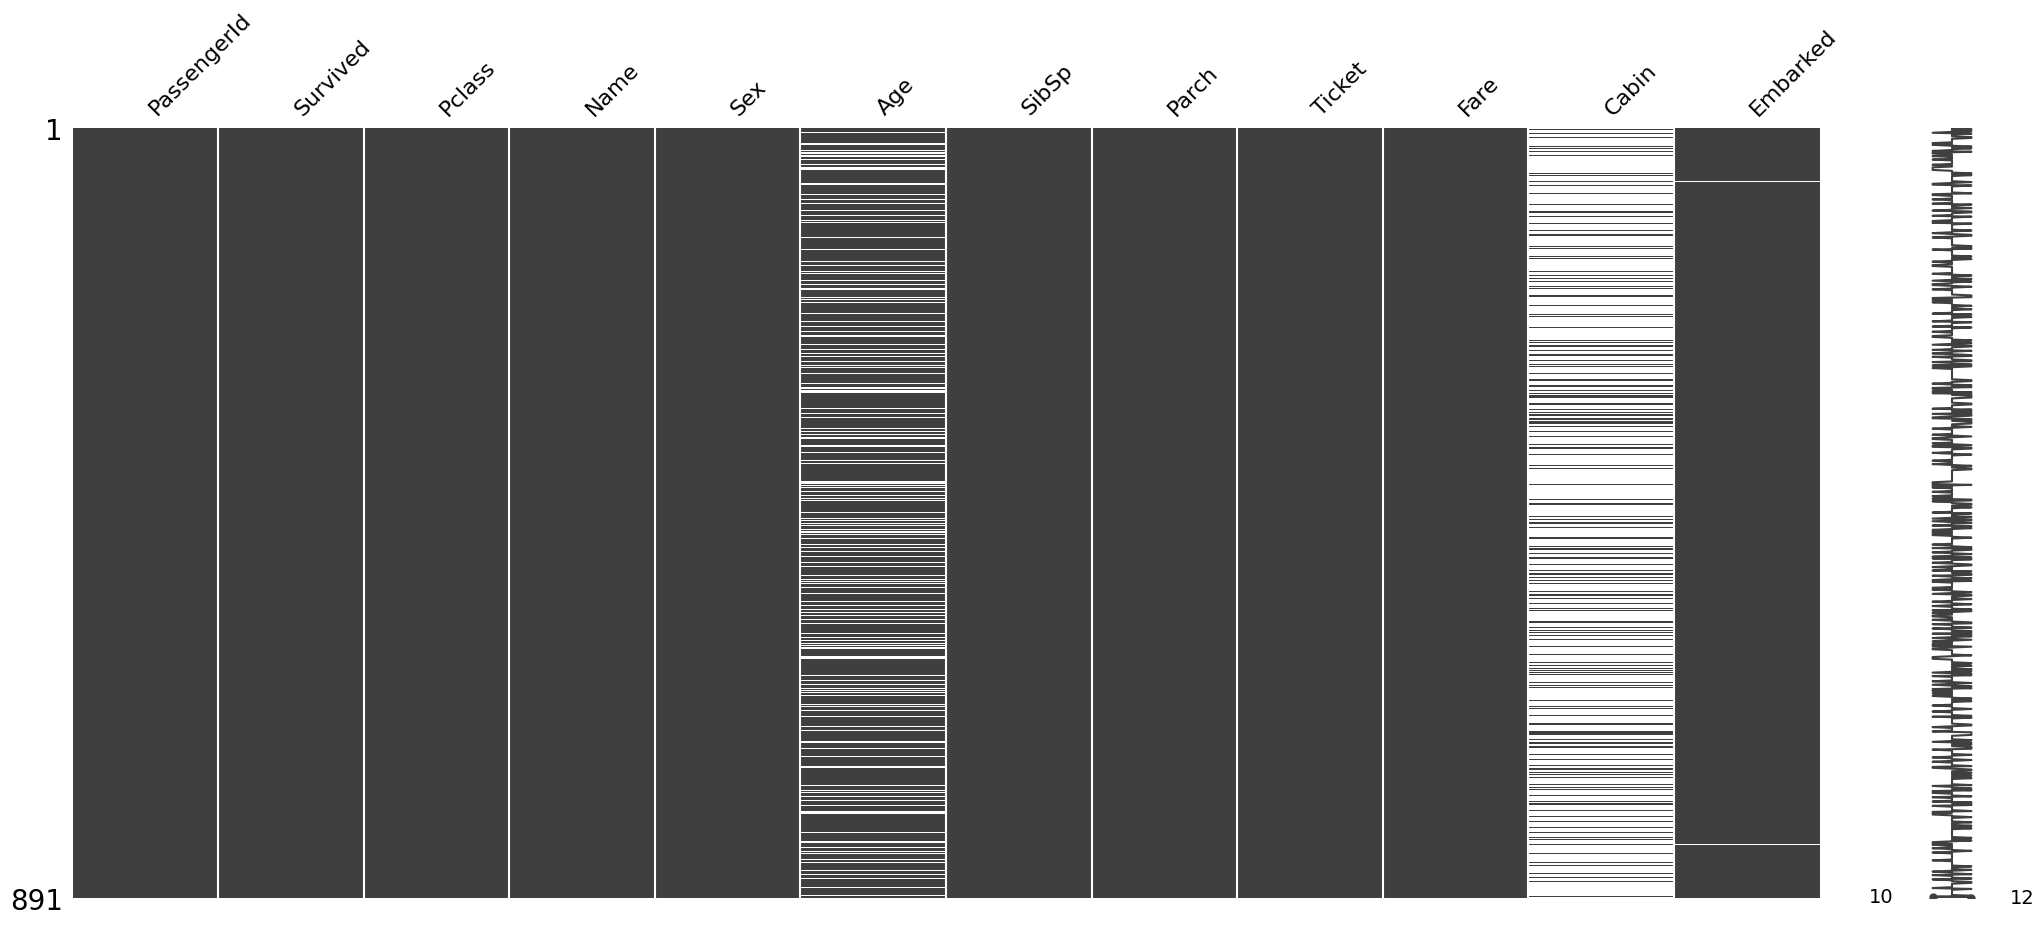

In [22]:
missingno.matrix(train_df)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [25]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [26]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

In [27]:
embarked_df = train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()

In [29]:
embarked_df.index

Index(['C', 'Q', 'S'], dtype='object', name='Embarked')

In [30]:
embarked_df.columns

MultiIndex([('PassengerId', 0),
            ('PassengerId', 1)],
           names=[None, 'Survived'])

<Axes: xlabel='Embarked'>

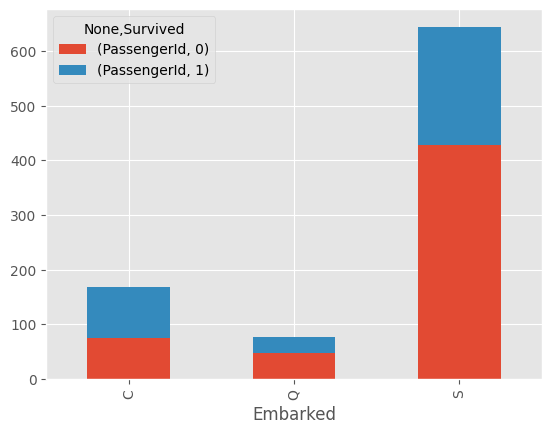

In [38]:
embarked_df.plot.bar(stacked=True)

In [40]:
sex_df = train_df[['Sex', 'Survived', 'PassengerId']].dropna().groupby(['Sex', 'Survived']).count().unstack()

<Axes: xlabel='Sex'>

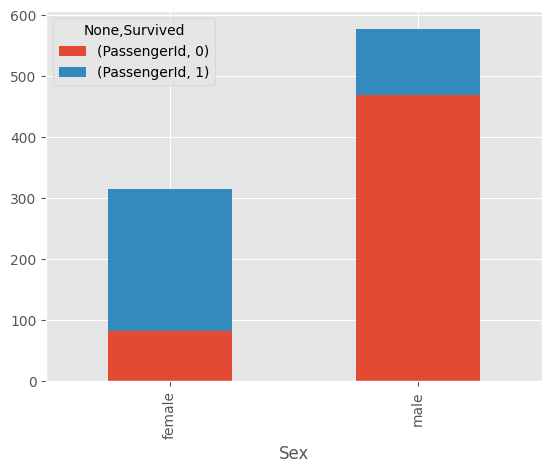

In [41]:
sex_df.plot.bar(stacked=True)

In [42]:
pd.get_dummies(train_df, columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,False,True


In [43]:
pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,True


In [44]:
train_df_corr = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

In [45]:
pd.get_dummies(train_df_corr, columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,True,False,False


In [46]:
train_df_corr =  pd.get_dummies(train_df_corr, columns=['Embarked'])

In [53]:
#corr함수 / 변수들끼리의 상관계수 / 객체가 object인 속성은 사용 불가
train_df_corr.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.778359,-0.496624,1.000000


In [54]:
corr_data = train_df_corr.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).corr()

<Axes: >

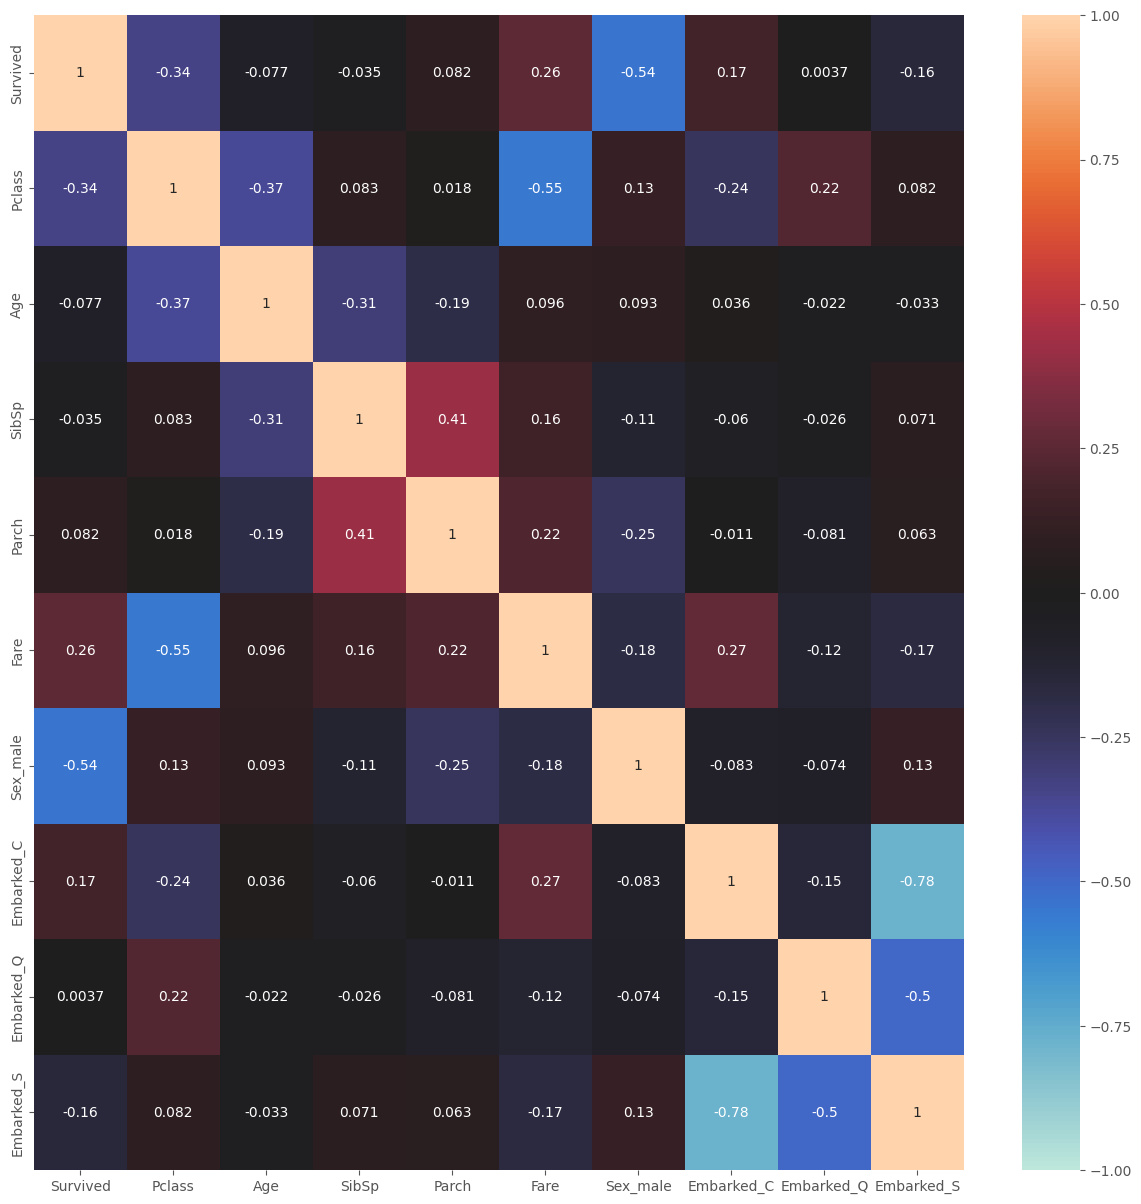

In [55]:
#상관계수에 대해 히트맵으로 시각화 
plt.figure(figsize=(15,15))
sns.heatmap(corr_data, vmax = 1, vmin = -1, center=0, annot=True)

In [58]:
#3. 전처리 과정 
pd.concat([train_df, test_df], ignore_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
#데이터 합치기
all_df = pd.concat([train_df, test_df], ignore_index=True)

In [61]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [65]:
#결측치 확인 
all_df.groupby(['Pclass'], as_index = False)['Fare'].mean()

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [66]:
all_df.Fare.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool

In [67]:
all_df[all_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [68]:
#결측치에 값을 넣기 위해 join 수행
Fare_mean = all_df.groupby(['Pclass'], as_index = False)['Fare'].mean()
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how='left')
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_x,Cabin,Embarked,Fare_y
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.302889
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,87.508992
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.302889
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,87.508992
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.302889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,13.302889
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,87.508992
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,13.302889
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,13.302889


In [72]:
all_df.loc[all_df['Fare_x'].isnull(), 'Fare_x'] = all_df['Fare_y']

In [73]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare_x            0
Cabin          1014
Embarked          2
Fare_y            0
dtype: int64

In [82]:
all_df.drop(['Fare_y'], axis=1).rename(columns={'Fare_x':'Fare'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [83]:
all_df = all_df.drop(['Fare_y'], axis=1).rename(columns={'Fare_x':'Fare'})

In [84]:
#Name 컬럼 작업
all_df.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [86]:
all_df.Name.str.split(".")

0                              [Braund, Mr,  Owen Harris]
1       [Cumings, Mrs,  John Bradley (Florence Briggs ...
2                               [Heikkinen, Miss,  Laina]
3         [Futrelle, Mrs,  Jacques Heath (Lily May Peel)]
4                             [Allen, Mr,  William Henry]
                              ...                        
1304                                [Spector, Mr,  Woolf]
1305                      [Oliva y Ocana, Dona,  Fermina]
1306                      [Saether, Mr,  Simon Sivertsen]
1307                               [Ware, Mr,  Frederick]
1308                          [Peter, Master,  Michael J]
Name: Name, Length: 1309, dtype: object

In [88]:
#expand하게되면 DataFrame으로 변환해줌 
all_df.Name.str.split("[,.]", expand=True)

,0,1,2,3
0,Braund,Mr,Owen Harris,None
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,Heikkinen,Miss,Laina,None
3,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,Allen,Mr,William Henry,None
...,...,...,...,...
1304,Spector,Mr,Woolf,None
1305,Oliva y Ocana,Dona,Fermina,None
1306,Saether,Mr,Simon Sivertsen,None
1307,Ware,Mr,Frederick,None


In [89]:
all_df.Name.str.split("[,.]", expand=True).iloc[:, :3]

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [90]:
name_df = all_df.Name.str.split("[,.]", expand=True).iloc[:, :3]

In [91]:
#컬럼명 1개 이상을 바꿀 때는 rename함수보다는 columns을 이용해서 쉽게 바꿀 수 있음
name_df.columns = ['family_name', 'honorific', 'name']

In [92]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [93]:
name_df.honorific.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [98]:
#map함수는 어디서든 동시에 적용해주는 함수 
name_df.map(lambda x : x.strip())

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [97]:
name_df = name_df.map(lambda x : x.strip())

In [102]:
name_df.honorific.value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [103]:
pd.concat([all_df, name_df], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [104]:
all_df = pd.concat([all_df, name_df], axis=1)

<Axes: xlabel='honorific', ylabel='Age'>

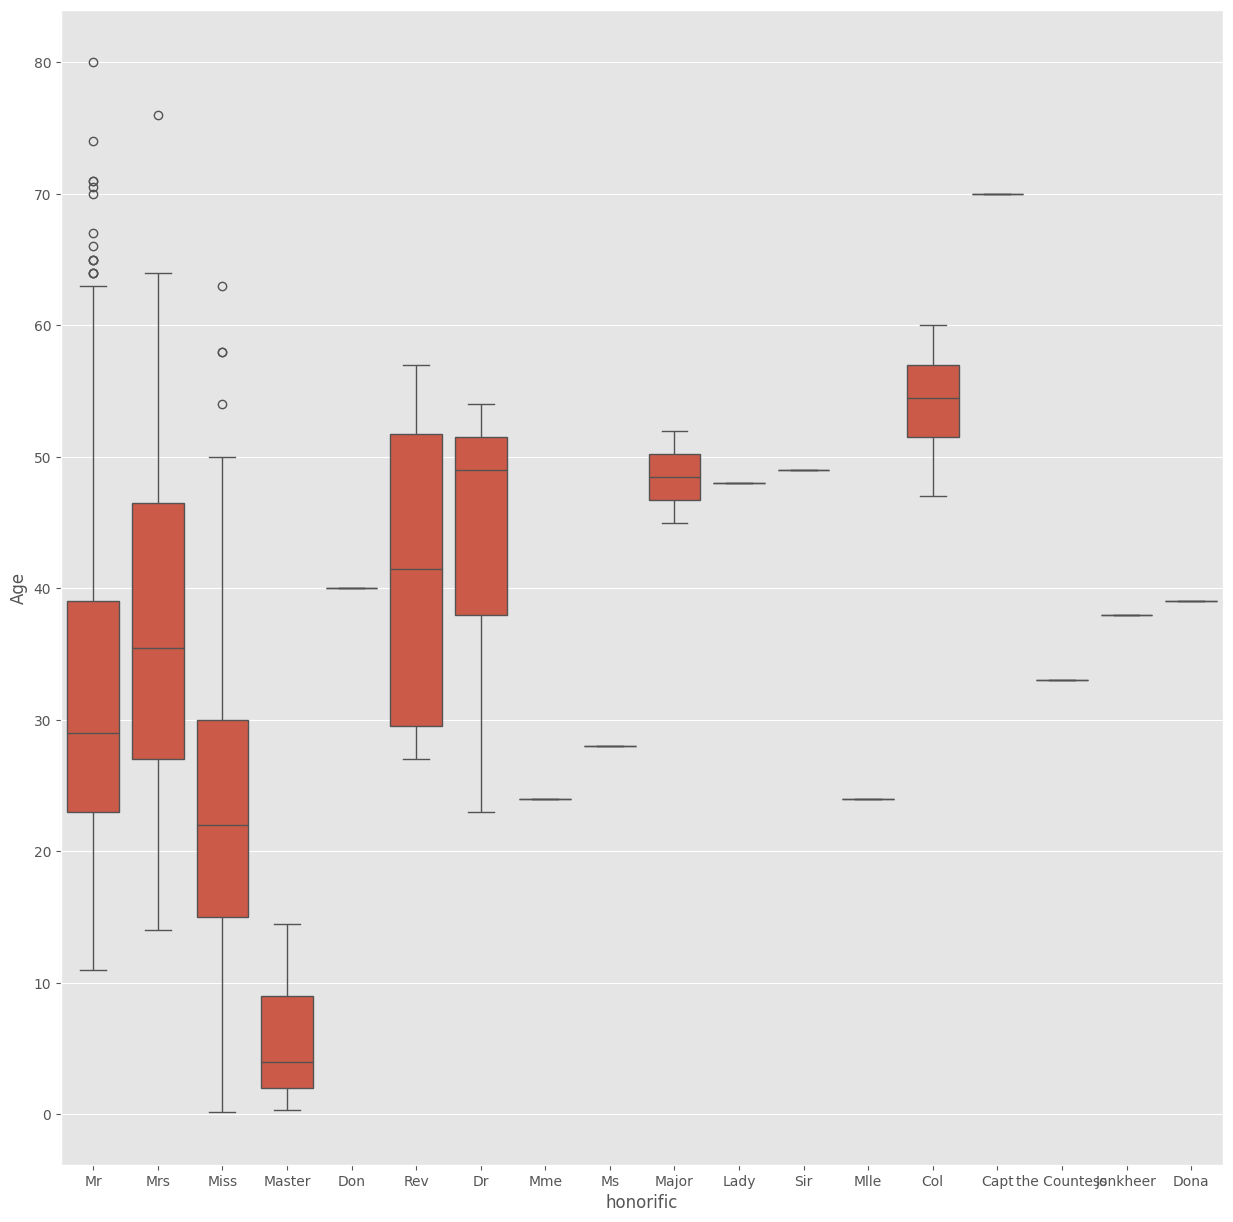

In [106]:
#호칭별 연령 분포 확인 
plt.figure(figsize=(15,15))
sns.boxplot(x = 'honorific', y='Age', data = all_df)

In [112]:
#호칭별 평균 나이
all_df.groupby(['honorific'])['Age'].mean()

honorific
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

<Axes: xlabel='honorific'>

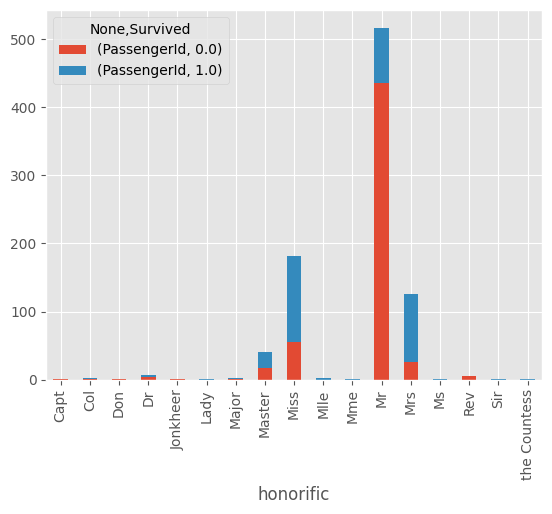

In [118]:
#호칭별 생존율 확인 / 결측치가 없는 속성을 함께 묶어주어야 함. 
all_df[['honorific', 'Survived', 'PassengerId']].dropna().groupby(['honorific', 'Survived'])[['PassengerId']].count().unstack().plot.bar(stacked=True)

In [119]:
all_df.Age.isnull().sum()

np.int64(263)

In [126]:
#호칭에 따른 평균 나이 계산하여 결측치값에 넣어주기 
#결측치 어떻게 처리할래? 방법 - 평균대치법, 단순 확률 대치법 등 어떠한 방식에 따라 결측치를 처리하여 데이터를 분석했는지가 중요
all_df.groupby(['honorific'], as_index=False)[['Age']].mean()

,honorific,Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [127]:
pd.merge(all_df, all_df.groupby(['honorific'], as_index=False)[['Age']].mean(), 
         on='honorific', how='left')

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,32.252151
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),36.994118
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,21.774238
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),36.994118
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,32.252151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,32.252151
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,39.000000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,32.252151
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,32.252151


In [128]:
all_df = pd.merge(all_df, all_df.groupby(['honorific'], as_index=False)[['Age']].mean(), 
         on='honorific', how='left')

In [129]:
all_df.loc[all_df.Age_x.isnull(), 'Age_x'] = all_df['Age_y']

In [131]:
all_df.Age_x.isnull().sum()

np.int64(0)

In [133]:
all_df.query("PassengerId == 6")

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y
5,6,0.0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,32.252151


In [134]:
all_df.query("PassengerId in [6, 18, 20]")

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y
5,6,0.0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,32.252151
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,32.252151,0,0,244373,13.0000,NaN,S,Williams,Mr,Charles Eugene,32.252151
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,36.994118,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,36.994118


In [135]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age_x             0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
Age_y             0
dtype: int64

In [136]:
#혼자 타이타닉호에 승선한 승객 변수 생성 
all_df[['SibSp', 'Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [139]:
all_df[['SibSp', 'Parch']].apply(lambda x : True if (x[0]+x[1]) == 0 else False, axis = 1)

/tmp/ipykernel_203/2578308676.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df[['SibSp', 'Parch']].apply(lambda x : True if (x[0]+x[1]) == 0 else False, axis = 1)


0       False
1       False
2        True
3       False
4        True
        ...  
1304     True
1305     True
1306     True
1307     True
1308    False
Length: 1309, dtype: bool

In [142]:
all_df['alone'] = all_df[['SibSp', 'Parch']].apply(lambda x : 1 if (x[0]+x[1]) == 0 else 0, axis = 1)

/tmp/ipykernel_203/1447282947.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df['alone'] = all_df[['SibSp', 'Parch']].apply(lambda x : 1 if (x[0]+x[1]) == 0 else 0, axis = 1)


In [149]:
all_df[all_df.alone == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y,alone
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,21.774238,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,32.252151,1
5,6,0.0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,32.252151,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,32.252151,1
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,21.774238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,NaN,S,Henriksson,Miss,Jenny Lovisa,21.774238,1
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,32.252151,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,39.000000,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,32.252151,1


In [148]:
all_df[all_df.alone == 1]['Survived'].value_counts()

Survived
0.0    374
1.0    163
Name: count, dtype: int64

In [150]:
all_df[all_df.alone == 1]['Survived'].value_counts(normalize=True)

Survived
0.0    0.696462
1.0    0.303538
Name: proportion, dtype: float64

In [153]:
all_df[['SibSp', 'Parch']].apply(lambda x : (x[0]+x[1]), axis=1).value_counts() 

/tmp/ipykernel_203/3053374396.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df[['SibSp', 'Parch']].apply(lambda x : (x[0]+x[1]), axis=1).value_counts()


0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [154]:
all_df['family_num'] = all_df[['SibSp', 'Parch']].apply(lambda x : (x[0]+x[1]), axis=1)

/tmp/ipykernel_203/4031884215.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df['family_num'] = all_df[['SibSp', 'Parch']].apply(lambda x : (x[0]+x[1]), axis=1)


In [156]:
all_df.sort_values(by='family_num', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y,alone,family_num
1251,1252,NaN,3,"Sage, Master. William Henry",male,14.500000,8,2,CA. 2343,69.550,NaN,S,Sage,Master,William Henry,5.482642,0,10
1233,1234,NaN,3,"Sage, Mr. John George",male,32.252151,1,9,CA. 2343,69.550,NaN,S,Sage,Mr,John George,32.252151,0,10
324,325,0.0,3,"Sage, Mr. George John Jr",male,32.252151,8,2,CA. 2343,69.550,NaN,S,Sage,Mr,George John Jr,32.252151,0,10
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,32.252151,8,2,CA. 2343,69.550,NaN,S,Sage,Mr,Douglas Bullen,32.252151,0,10
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,36.994118,1,9,CA. 2343,69.550,NaN,S,Sage,Mrs,John (Annie Bullen),36.994118,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1290,NaN,3,"Larsson-Rondberg, Mr. Edvard A",male,22.000000,0,0,347065,7.775,NaN,S,Larsson-Rondberg,Mr,Edvard A,32.252151,1,0
1287,1288,NaN,3,"Colbert, Mr. Patrick",male,24.000000,0,0,371109,7.250,NaN,Q,Colbert,Mr,Patrick,32.252151,1,0
20,21,0.0,2,"Fynney, Mr. Joseph J",male,35.000000,0,0,239865,26.000,NaN,S,Fynney,Mr,Joseph J,32.252151,1,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,36.994118,0,0,2649,7.225,NaN,C,Masselmani,Mrs,Fatima,36.994118,1,0


In [155]:
all_df[all_df.family_num == 10]['Survived'].value_counts()

Survived
0.0    7
Name: count, dtype: int64

In [158]:
#속성 정리 

In [157]:
#float이나 int형이 아닌 데이터만 추출 
all_df.columns[all_df.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'family_name',
       'honorific', 'name'],
      dtype='object')

In [159]:
all_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y,alone,family_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,32.252151,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),36.994118,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,21.774238,1,0


In [160]:
all_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'name', 'family_name', 'Age_y'], axis=1)

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,alone,family_num
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,0,1
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,0,1
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,1,0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,0,1
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.252151,0,0,8.0500,S,Mr,1,0
1305,NaN,1,female,39.000000,0,0,108.9000,C,Dona,1,0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,1,0
1307,NaN,3,male,32.252151,0,0,8.0500,S,Mr,1,0


In [161]:
all_df2 = all_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'name', 'family_name', 'Age_y'], axis=1)

In [163]:
all_df2.head(3)

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,alone,family_num
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,0,1
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,0,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1,0


In [162]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [164]:
le = LabelEncoder()

In [165]:
#적용과 동시에 변환까지 
le.fit_transform(all_df2.Sex)

array([1, 0, 0, ..., 1, 1, 1])

In [166]:
all_df2.Sex = le.fit_transform(all_df2.Sex)

In [167]:
le.transform(['male', 'female'])

array([1, 0])

In [170]:
all_df2.honorific.isin(['Mr', 'Mrs', 'Miss', 'Master', 'Mme', 'Rev', 'Dr'])

0        True
1        True
2        True
3        True
4        True
        ...  
1304     True
1305    False
1306     True
1307     True
1308     True
Name: honorific, Length: 1309, dtype: bool

In [182]:
all_df2.loc[~all_df2.honorific.isin(['Mr', 'Mrs', "Miss", "Master", 'Mme', 'Rev', 'Dr']), 'honorific'] = 'other'

In [180]:
all_df2

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,alone,family_num
0,0.0,3,1,22.0,1,0,7.25,S,Mr,0,1
1,1.0,1,0,38.0,1,0,71.2833,C,Mrs,0,1
2,1.0,3,0,26.0,0,0,7.925,S,Miss,1,0
3,1.0,1,0,35.0,1,0,53.1,S,Mrs,0,1
4,0.0,3,1,35.0,0,0,8.05,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.05,S,Mr,1,0
1305,other,other,other,other,other,other,other,other,other,other,other
1306,NaN,3,1,38.5,0,0,7.25,S,Mr,1,0
1307,NaN,3,1,32.252151,0,0,8.05,S,Mr,1,0


In [189]:
all_df2.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      17
Rev         8
Dr          8
Mme         1
Name: count, dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [192]:
for col in all_df2.columns[all_df2.dtypes == 'object']:
    le = LabelEncoder()
    all_df2[f'{col}'] = le.fit_transform(all_df2[f'{col}'])

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [193]:
train_df_trans = all_df2[all_df2.Survived.notnull()].copy()

In [194]:
y_data = train_df_trans.pop('Survived')

In [195]:
X_data = train_df_trans

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [197]:
X_train.shape

(716, 10)

In [198]:
X_test.shape

(179, 10)